# Import all modules

In [1]:
import pandas as pd # to start reading csv
import numpy as np
import matplotlib.pyplot as plt #plotting basic
import seaborn as sns
%matplotlib inline

# Reading all the files

In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
order_products_train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

# 1: Opening file 'Aisles', 'Departments', and 'Products'

In [3]:
print('Total Aisles: {}'.format(aisles.shape[0]))
aisles.head() #showing what food is placed on which aisle

Total Aisles: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
print('Total departments: {}'.format(departments.shape[0]))
departments.head() # shows what kind of food is in the department

Total departments: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
print('Total products: {}'.format(products.shape[0]))
products.head() #shows what aisle and department is the specific product

Total products: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# 2: Orders (userID relative) vs. time

In [6]:
orders.head() 
print("orders_shape: {}".format(orders.shape))
print(orders.groupby('eval_set').size())
orders.head()
#shows for each order made by a user, there is a specification of time of order and order dates before previous

orders_shape: (3421083, 7)
eval_set
prior    3214874
test       75000
train     131209
dtype: int64


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


# 2a: Orders count by day of the week and hour of the day

- At what hour of the day do customers order most frequently?
- at what day of the week do customers order most frequently?

[<matplotlib.text.Text at 0x11871a890>, <matplotlib.text.Text at 0x115beedd0>]

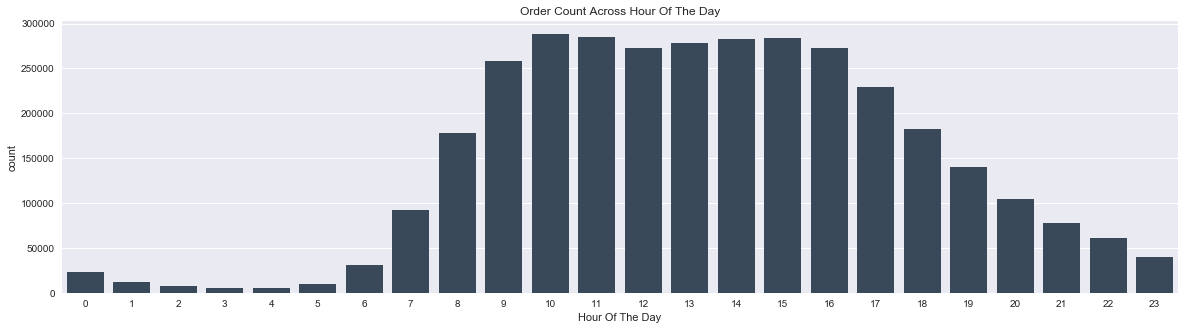

In [7]:
#Plotting for the hour od
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(data=orders,x="order_hour_of_day",ax=ax,color="#34495e")
ax.set(xlabel='Hour Of The Day',title="Order Count Across Hour Of The Day")

It can be depicted that the peak time for orders made by customers are between 10:00 to 15:00, possibly during the work times for adults.

[<matplotlib.text.Text at 0x13187f550>, <matplotlib.text.Text at 0x1187be9d0>]

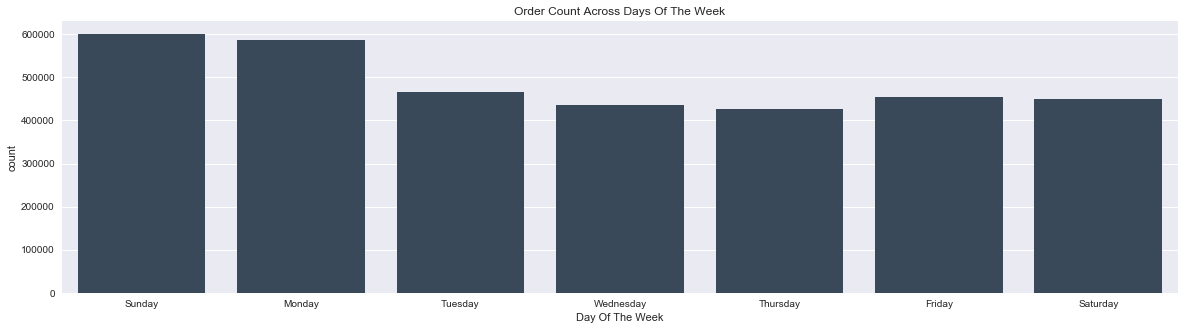

In [8]:
#Plotting for the day of the week
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
ordersDay = orders[["order_dow"]].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

sns.countplot(color="#34495e",data=ordersDay,x="order_dow",ax=ax,order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
ax.set(xlabel='Day Of The Week',title="Order Count Across Days Of The Week")

It looks like orders are mostly made during the weekends and from the above, during the day time. Let's look at the results of hours and day further to find which day and time is the most frequent order coming from.

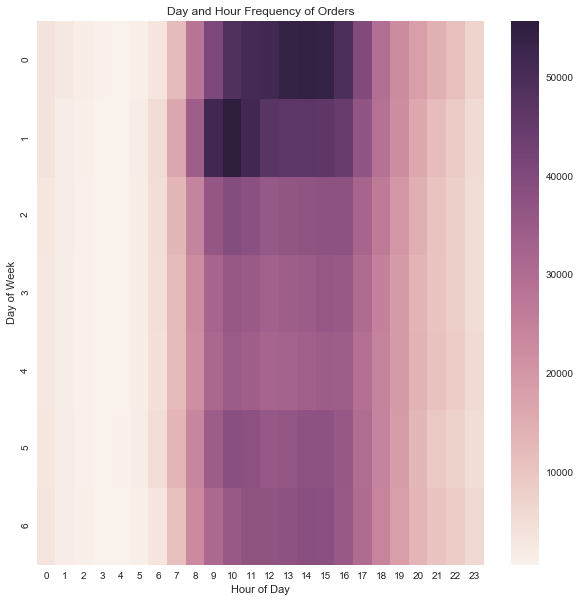

In [9]:
dow_time_merged = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
dow_time_merged = dow_time_merged.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(10,10))
sns.heatmap(dow_time_merged)
plt.title("Day and Hour Frequency of Orders")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")

plt.show()

From the heatmap above, it appears that the darker contrast of color shows the most frequent orders made during the day and time of the week. Days of the week value of 0 and 1, which corresponds to Sunday and Monday, have the darkest value for the following:
- Sunday at 2 pm, generally most orders are done between 10 am - 5 pm
- Monday at 10 pm, generally crowded between 8 am - 5pm

The trend understood from above is fairly interesting, as it seems like the end of weekend is when customers starts to think on what to purchase or chose to purchase and on Monday (regular workday), customers may have choose to come back to the order cart to finish the orders or place another order. This information can be analyzed further when looking at the reorder counts

# 2b: Orders Reorder Count by hour of the day => move to 3a)

We want to know when customers will start working on the orders prior to the orders made, the reorder dataset can provide this visualization.

[<matplotlib.text.Text at 0x11886afd0>, <matplotlib.text.Text at 0x118e12f90>]

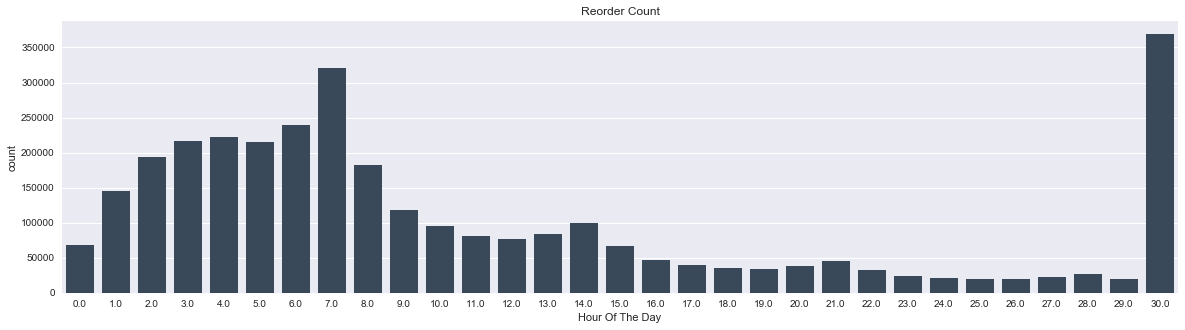

In [10]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(color="#34495e",data=orders,x="days_since_prior_order",ax=ax)
ax.set(xlabel='Hour Of The Day',title="Reorder Count")

From the chart above, it can be seen the reorder timeframe is about 30 days. The peaks of the days to reorder indeed have a pattern of every 7 days (7, 14, 21,28 with 30 days being the highest peak). This could mean that the customer is taking advantage of their 30 days trial for Instacart. Hence, a trend can be seen for customers shopping pattern; they tend to order about every 7 days.

# 2c: Min and Max order made by count

For the analysis below, an order count for the reorder dataset is done to show how many products is included per reorder made prior to the existing orders.

[<matplotlib.text.Text at 0x12c1d2890>, <matplotlib.text.Text at 0x1189dc5d0>]

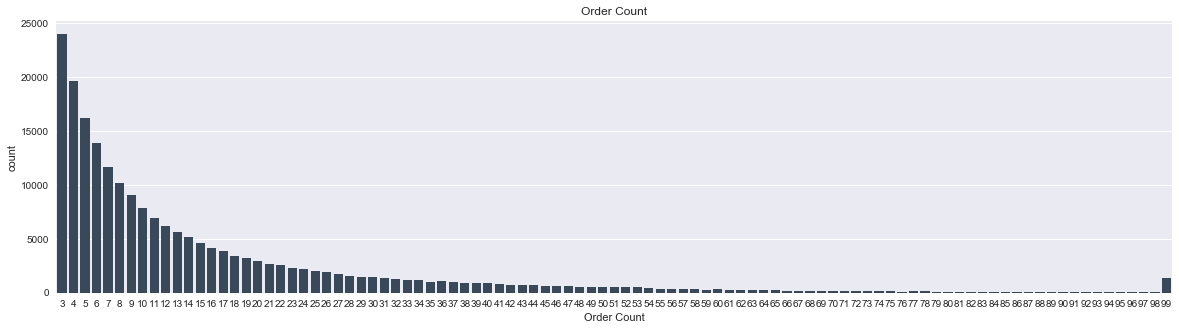

In [11]:
orderCount = orders[orders["eval_set"]=="prior"].groupby(by=["user_id"])["order_id"].count().to_frame()
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(color="#34495e",data=orderCount,x="order_id",ax=ax)
ax.set(xlabel='Order Count',title="Order Count")

It turns out no order made is less than 3 products and most orders are capped at 100 products

# 2d: Finding out the best selling products between customers prior orders

merging the dataset with prior orders is probably the best option to find the specifics of best selling products

In [12]:
#Checking data type of the dataset and whether there is any missing value
priors = pd.merge(order_products_prior, products, on='product_id')
total_rows = priors.count()
priors.info()
print(total_rows)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 7 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
product_name         object
aisle_id             int64
department_id        int64
dtypes: int64(6), object(1)
memory usage: 1.9+ GB
order_id             32434489
product_id           32434489
add_to_cart_order    32434489
reordered            32434489
product_name         32434489
aisle_id             32434489
department_id        32434489
dtype: int64


In [13]:
priors.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


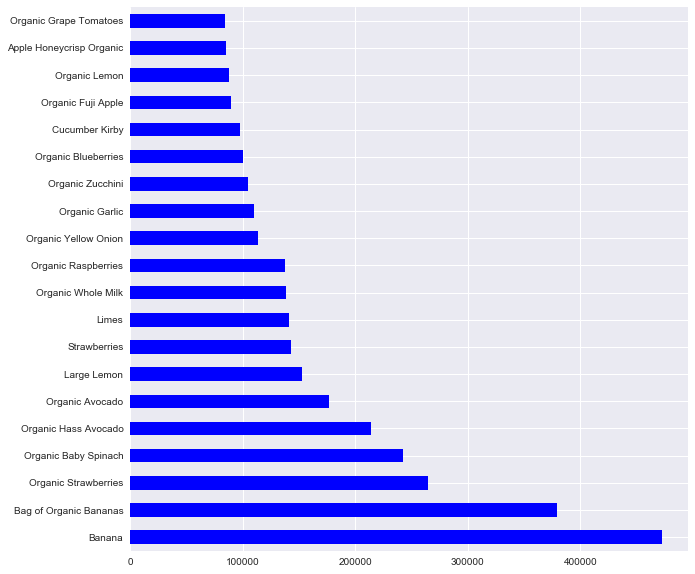

In [14]:
best_selling = priors['product_name'].value_counts()
plt.figure(figsize= (10,10))
best_selling.head(20).plot(kind='barh', color='blue')
plt.show()

It is apparent that the top products purchase on prior orders are mostly healthy items, this could be the mission for Instacart to bring to their customers; Healthy products for at a regular price compared to in-store purchase. To further see whether such information is true, let's merge the dataset with the aisles to see more specifications.

In [15]:
#merging the current dataset with aisles and seeing its distribution via pie chart
priors = pd.merge(priors,aisles, on='aisle_id', how='inner')
print(priors.count())
priors.info()
priors.head()

order_id             32434489
product_id           32434489
add_to_cart_order    32434489
reordered            32434489
product_name         32434489
aisle_id             32434489
department_id        32434489
aisle                32434489
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 8 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
product_name         object
aisle_id             int64
department_id        int64
aisle                object
dtypes: int64(6), object(2)
memory usage: 2.2+ GB


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs


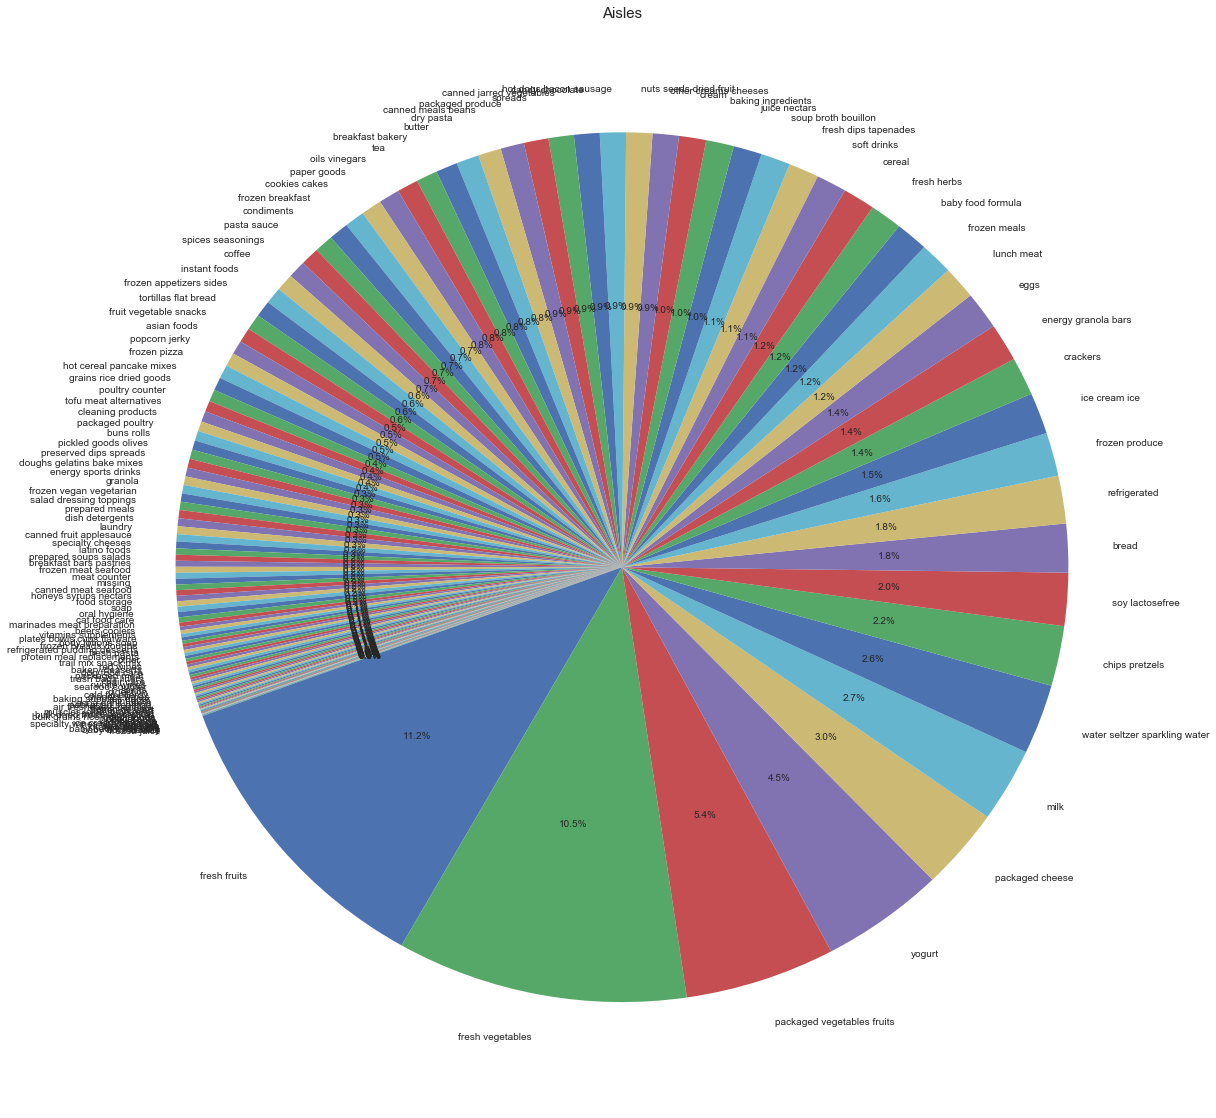

In [16]:
plt.figure(figsize=(20,20))
aisle_series = priors['aisle'].value_counts(20)
labels = (np.array(aisle_series.index))
sizes = (np.array((aisle_series / aisle_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Aisles", fontsize=15)
plt.show()

From the depiction from the chart above, The most ordered products comes from the aisle: Fresh Fruit (11.2%), Fresh vegetables (10.5%), Packaged Vegetables Fruits (5.4%). This result seems usual since the most ordered products are vegetables/fruits or in general healthy products. Now lets look at the problem further by inserting the departments into consideration.

In [17]:
priors = pd.merge(priors,departments, on='department_id', how='inner')
print(priors.count())
priors.info()
priors.head()

order_id             32434489
product_id           32434489
add_to_cart_order    32434489
reordered            32434489
product_name         32434489
aisle_id             32434489
department_id        32434489
aisle                32434489
department           32434489
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 9 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
product_name         object
aisle_id             int64
department_id        int64
aisle                object
department           object
dtypes: int64(6), object(3)
memory usage: 2.4+ GB


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


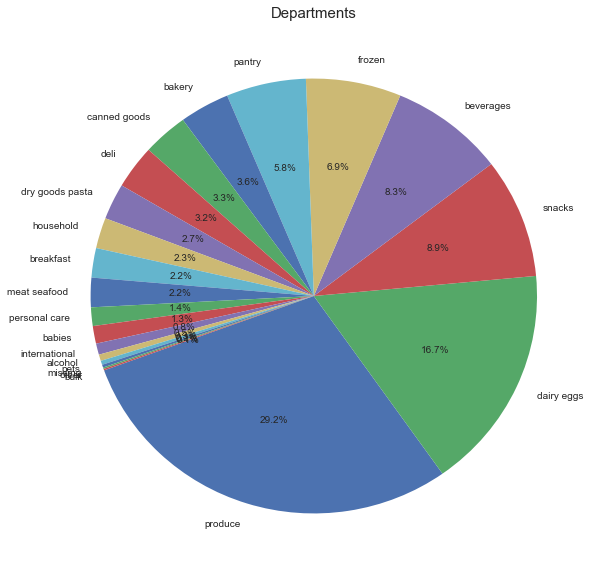

In [18]:
#pie chart to see the distribution of what products are ordered from which department the most
plt.figure(figsize=(10,10))
temp_series = priors['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments", fontsize=15)
plt.show()

Similarly for the deparments review, healthy products prevails in the option for customers who chose to shop online for grocery. This includes departments from produce (29.2%) and dairy eggs (16.7%). While fresh options tend to be more popular among the purchases, prior purchase on other proportion of orders may have come from habitual purchase. Habitual purchase are more likely group with other products during reorder based on how closely the associated products are. We will discuss that later on.

# 3 Products Reorders count on prior data

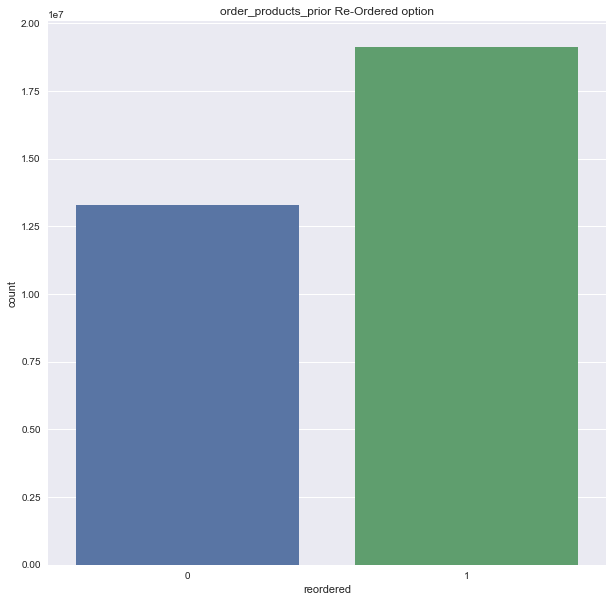

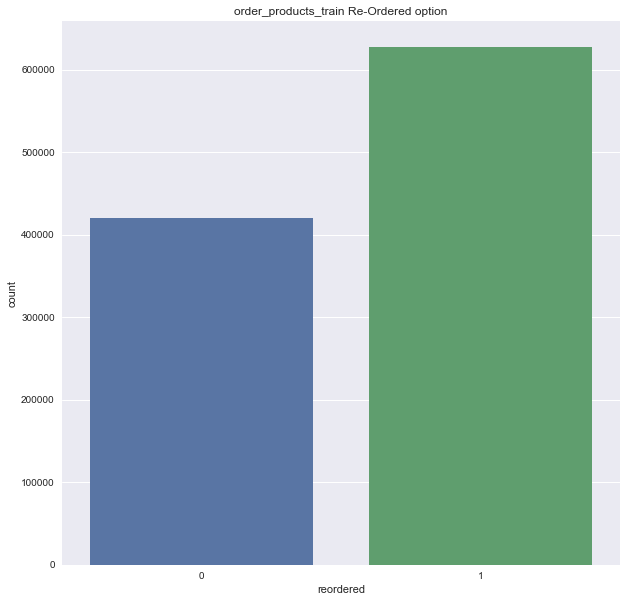

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x=order_products_prior['reordered'])
plt.title('order_products_prior Re-Ordered option')

plt.figure(figsize=(10,10))
sns.countplot(x=order_products_train['reordered'])
plt.title('order_products_train Re-Ordered option')

plt.show()

Let's make further comparison between prior and train data too find out whether the trend for reordering is the same

In [20]:
order_counts_prior = order_products_prior.groupby("order_id")["product_id"].count().to_frame()["product_id"].value_counts().to_frame()
order_counts_prior["count"] = order_counts_prior["product_id"]
order_counts_prior["no_of_products"] = order_counts_prior.index

In [21]:
order_counts_train = order_products_train.groupby("order_id")["product_id"].count().to_frame()["product_id"].value_counts().to_frame()
order_counts_train["count"] = order_counts_train["product_id"]
order_counts_train["no_of_products"] = order_counts_train.index

[<matplotlib.text.Text at 0x12be77c10>, <matplotlib.text.Text at 0x11dff0ad0>]

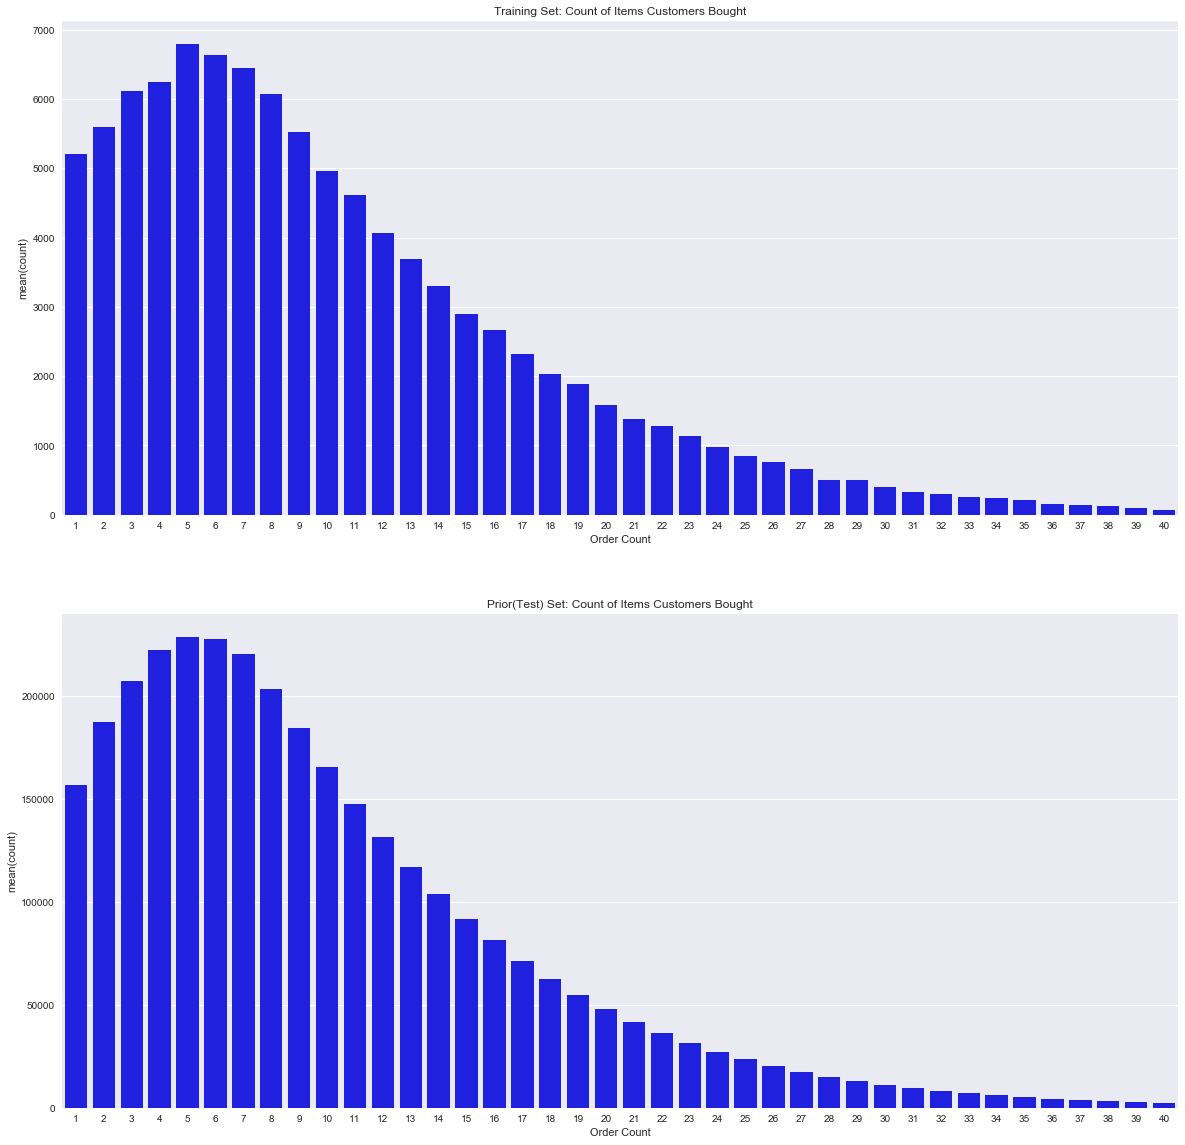

In [22]:
fig,(ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(20,20)
sns.barplot(data=order_counts_train.head(40),x="no_of_products",y="count",ax=ax1, color='blue')
sns.barplot(data=order_counts_prior.head(40),x="no_of_products",y="count",ax=ax2, color='blue')
ax1.set(xlabel='Order Count',title="Training Set: Count of Items Customers Bought")
ax2.set(xlabel='Order Count',title="Prior(Test) Set: Count of Items Customers Bought")

In summary of the claim, the trend seems to stay the same although the amount of dataset included is significantly different

In [23]:
#let's now count the numbers of reorders for both the datasets for prior and train
#prior
import math
from __future__ import division
from decimal import Decimal
getcontext().prec = 100

prior_reorder_rate = (len(order_products_prior[order_products_prior['reordered'] == 1]) / len(order_products_prior['reordered']))
                                 
print("Reorder Rate for Train Set: " + str(prior_reorder_rate))


#train
train_reorder_rate = (len(order_products_train[order_products_train['reordered'] == 1]) / len(order_products_train['reordered']))
                                 
print("Reorder Rate for Prior Orders: " + str(train_reorder_rate))

NameError: name 'getcontext' is not defined

Both datasets respond with a decent amount of reorders, so reordering from customers bound to happen indeed.

In [ ]:
prior_reorder = order_products_prior[order_products_prior['reordered'] == 1]
prior_reorder = pd.merge(prior_reorder, products, how = 'left', on='product_id')

plt.figure(figsize=(15,15))

plt.subplot(1,2,2)
best_selling_reorders = prior_reorder['product_name'].value_counts()
best_selling_reorders.head(20).plot(kind='barh', color='blue')
plt.xlabel("Amount of Products Re-ordered", fontsize='large')
plt.ylabel("Product", fontsize='large')
plt.title("Most Commonly Re-Ordered Products", fontsize='large')


plt.subplot(1,2,1)
best_selling = priors['product_name'].value_counts()
best_selling.head(20).plot(kind='barh', color='blue')
plt.xlabel("Amount of Products Ordered", fontsize='large')
plt.ylabel("Product", fontsize='large')
plt.title("Most Commonly Ordered Products", fontsize='large')

plt.tight_layout()

plt.show()

Both dataset shows a similarity in the top order counts.

# Feature Engineering: Adding on the column Reorder rate, HOD of order, order frequency

In [ ]:
orders_time= orders[['order_id','order_hour_of_day']]
prior_reorder=pd.merge(prior_reorder,orders_time, how='left', on='order_id')
prior_reorder.head()

In [ ]:
prior_orders=orders[orders['eval_set']=='prior']
prior_orders= prior_orders[['order_id','user_id']]
prior_orders.head()
prior_reorder=pd.merge(prior_reorder,prior_orders, how='left', on='order_id')
prior_reorder.head()

In [ ]:
prior_reorder=prior_reorder.groupby("user_id_x")["product_id"].count()


# 3a: Analysing Order Product Prior and Order Product Train

In [ ]:
color = sns.color_palette()
cnt_srs = orders.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

In [ ]:
orders[orders.user_id <= 10].groupby(['user_id','eval_set']).size().unstack(fill_value=0)

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(orders['user_id'].value_counts())

In [ ]:
print("order_products_prior shape: {}".format(order_products_prior.shape))
order_products_prior.head()

In [ ]:
print("order_products_train shape: {}".format(order_products_train.shape))
order_products_train.head()

In [ ]:
order_products_prior['eval_set'] = 'prior'
order_products_train['eval_set'] = 'train'
order_products = order_products_prior.append(order_products_train, ignore_index=True)

cnt_products_per_order = order_products.groupby('order_id').size()
plt.figure(figsize=(20,8))
sns.countplot(cnt_products_per_order)
xt = plt.xticks(rotation='vertical')

# 4a) Machine Learning Section

In [ ]:
train_set = orders[orders['eval_set']=='train']
train_set.head()

In [ ]:
train_set = pd.merge(train_set, order_products_train, on='order_id', how='inner')
train_set = pd.merge(train_set, products, on = 'product_id', how = 'inner')
train_set = pd.merge(train_set, departments, on = 'department_id', how = 'inner')
train_set = pd.merge(train_set, aisles, on = 'aisle_id', how = 'inner')
print(train_set.shape)
train_set.head()

In [ ]:
prior_set = orders[orders['eval_set']=='prior']
prior_set = prior_set.merge(order_products_prior, on='order_id')
prior_set = pd.merge(prior_set, products, on = 'product_id', how = 'inner')
prior_set = pd.merge(prior_set, departments, on = 'department_id', how = 'inner')
prior_set = pd.merge(prior_set, aisles, on = 'aisle_id', how = 'inner')
print(prior_set.shape)
prior_set.head()

In [ ]:
test_set = orders[orders['eval_set']=='test']
test_set.head()

# 4b: Data Wrangling

In [ ]:
train_set = train_set.fillna(0)
prior_set = train_set.fillna(0)
test_set =  train_set.fillna(0)

In [ ]:
non_text = [',','-',' ','?','.','&','%','#', '(',')','[',']','*','^','$','@','=','+','!','®']
for symbols in non_text:
    train_set['product_name'] = train_set['product_name'].str.replace(symbols, '')
    prior_set['product_name'] = prior_set['product_name'].str.replace(symbols, '')
train_set.info()
prior_set.info()

add in column on how many times user bought this product, how many times this product was bought

another column is reorder rate = product reordered by this customer/number of order by this customer